# Exploratory Data Analysis

### Import Libraries & Dataset

We start EDA by importing the essential libraries:

In [127]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

We will also import the dataset that was cleaned:

In [128]:
import os
dir = os.getcwd()
os.chdir("..")

cleaned_train = pd.read_csv("datasets/clean_train.csv")
os.chdir(dir)

We can view the cleaned dataset to ensure that the imported dataset is correct:

In [129]:
cleaned_train.head()

,Unnamed: 0,text,emotion,clean_text
0,0,i didnt feel humiliated,sadness,humiliated
1,1,i can go from feeling so hopeless to so damned...,sadness,go hopeless damned hopeful around someone care...
2,2,im grabbing a minute to post i feel greedy wrong,anger,grabbing minute post greedy wrong
3,3,i am ever feeling nostalgic about the fireplac...,love,ever nostalgic fireplace know still property
4,4,i am feeling grouchy,anger,grouchy


### Exploratory Data Analysis

We start the EDA process by viewing the most commonly used words for each emotion using WordCloud:

anger


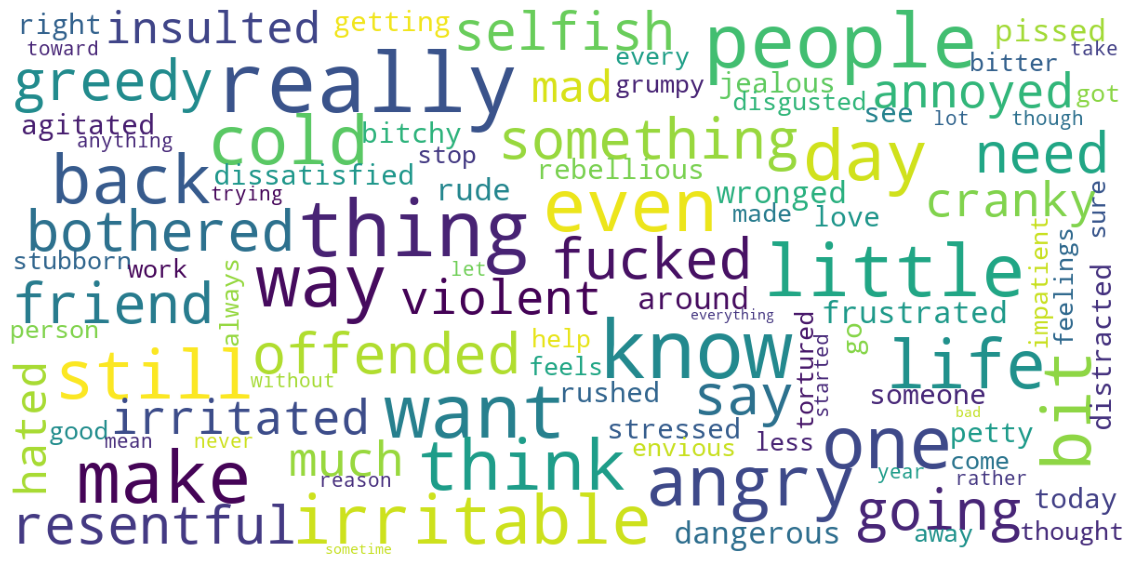

fear


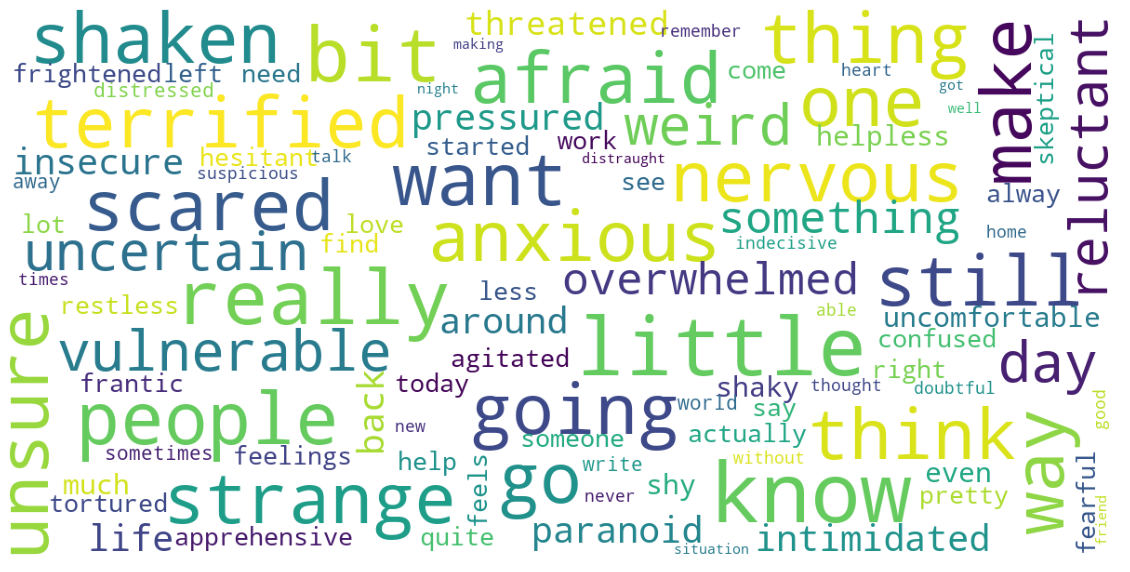

joy


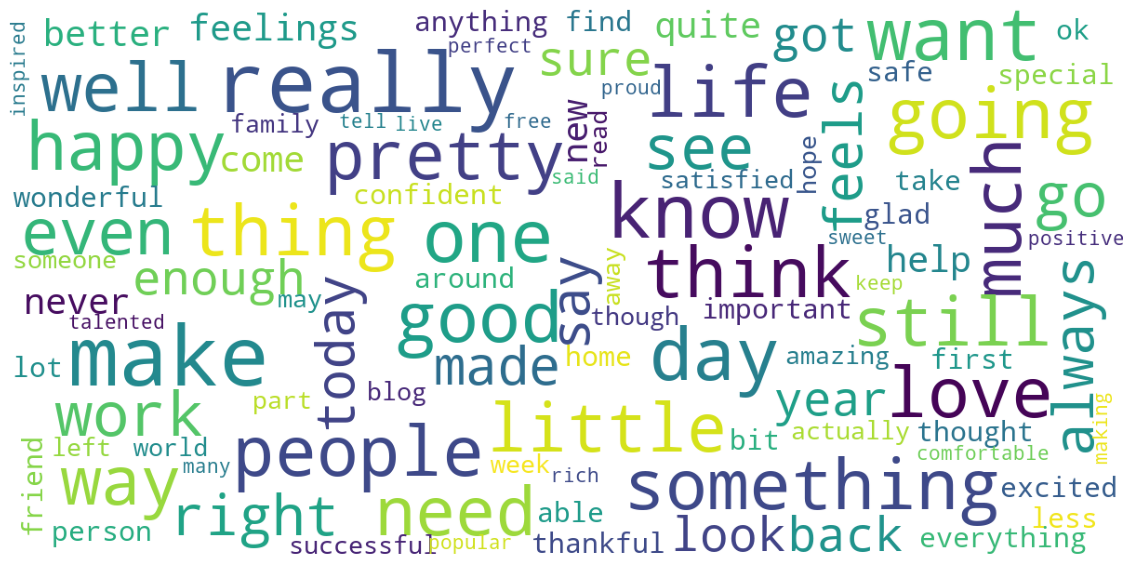

love


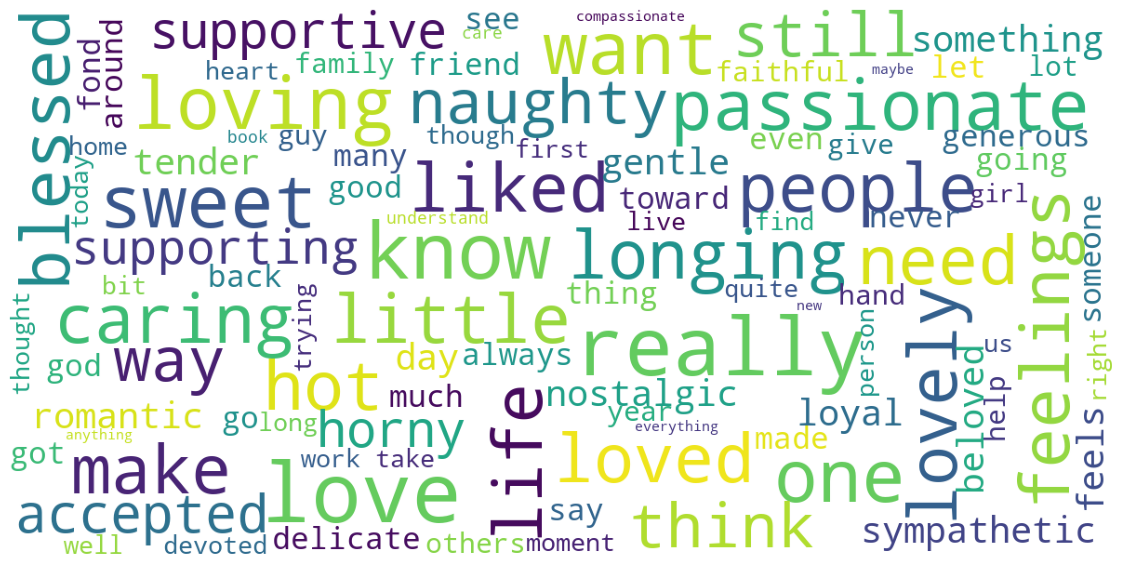

sadness


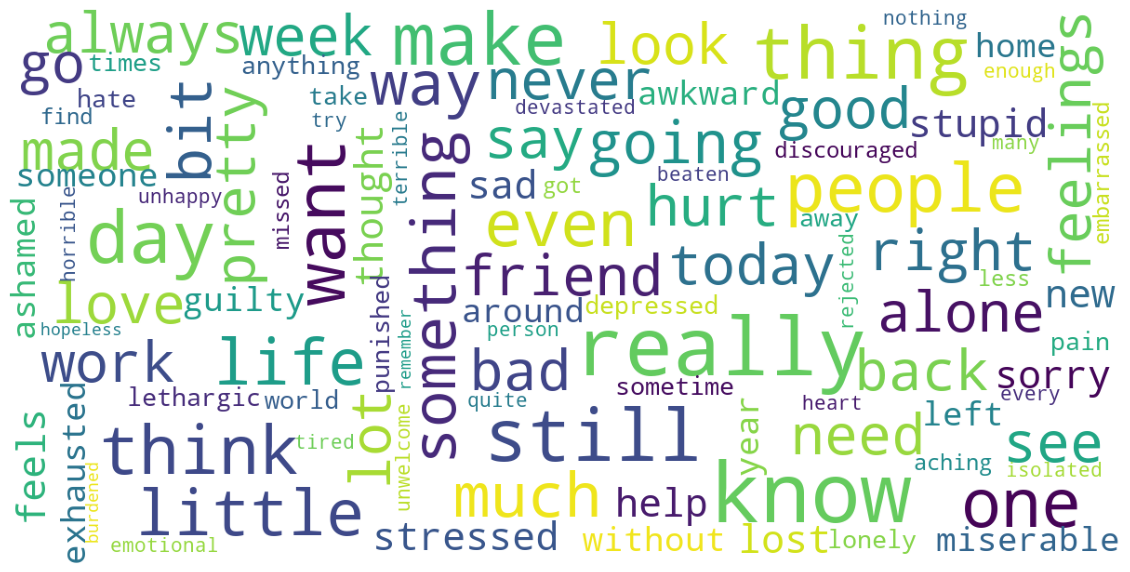

surprise


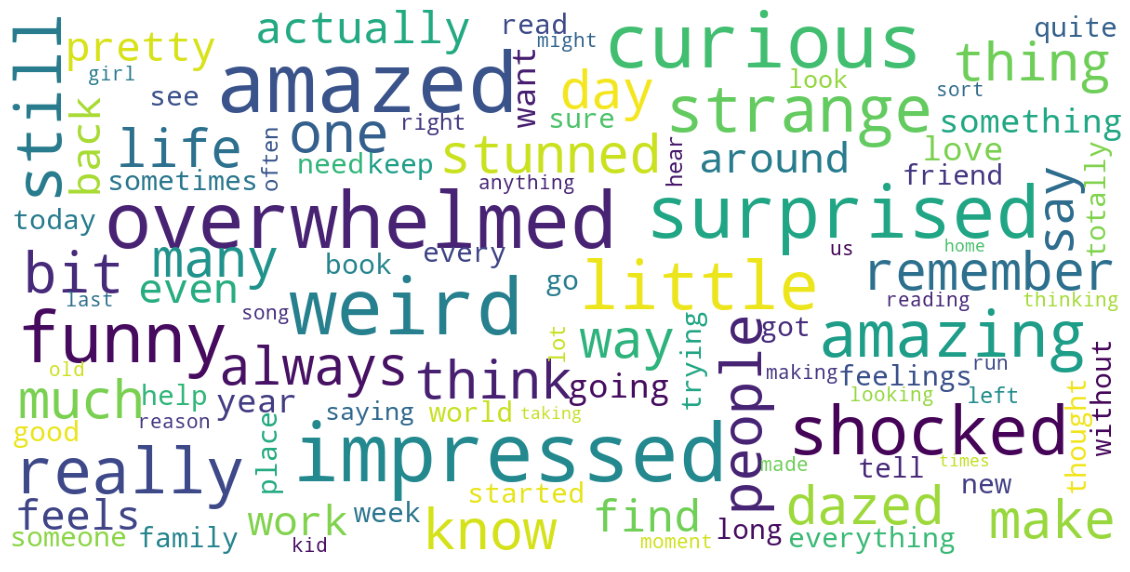

In [131]:
from wordcloud import WordCloud, STOPWORDS

def show_wordcloud(data, column, bg, max_words, max_font_size, scale, figsize):

    stopwords = set(STOPWORDS)
    text = " ".join(t for t in data[column])
   
    def display():
        wordcloud = WordCloud(
            background_color = bg,
            stopwords = stopwords,
            max_words = max_words,
            max_font_size = max_font_size,
            scale = scale,
            random_state = 1)
    
        wordcloud = wordcloud.generate(str(text))

        fig = plt.figure(1, figsize = figsize)
        plt.axis('off')

        plt.imshow(wordcloud)
        plt.show()

    display()

for i in pd.Categorical(cleaned_train['emotion']).categories:
    df = cleaned_train[cleaned_train['emotion'] == i]
    print(i)
    show_wordcloud(df, 'clean_text', 'white', 100, 30, 3, (20, 20))